In [83]:
%run ./../libs/bayesianOptimization/python/gp.py
%run ./../libs/bayesianOptimization/python/plotters.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

In [62]:
def target(x1,x2):
    return  -1 *((4 - (2.1 * (x1**2)) + (x1**4)/3) * (x1**2) + x1*x2 + (-4 + 4*(x2**2)) * x2**2)

In [63]:
def target1D(x):
    return  -1 *((4 - (2.1 * (x[0]**2)) + (x[0]**4)/3) * (x[0]**2) + x[0]*x[1] + (-4 + 4*(x[1]**2)) * x[1]**2)

In [64]:
X1Vals = np.linspace(-3,3,1000)
X2Vals = np.linspace(-2,2,1000)
param_grid = np.array([[x1, x2] for x1 in X1Vals for x2 in X2Vals])
real_loss = [target1D(params) for params in param_grid]

# The maximum is at:
print("max is at")
maxParamsIDX = np.array(real_loss).argmax()
print(param_grid[maxParamsIDX, :], np.array(real_loss).max())

max is at
[-0.08708709  0.71071071] 1.0315732914116744


In [65]:
"""
X1, X2 = np.meshgrid(X1Vals, X2Vals)
plt.figure()
cp = plt.contourf(X1, X2, np.array(real_loss).reshape(X1.shape), 10)
plt.colorbar(cp)
plt.title('Filled contours plot of loss function $\mathcal{6C}$($X_1$, $X_2$)')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.scatter([0.0898, -0.0898], [-0.7126, 0.7126])
plt.show()
"""

"\nX1, X2 = np.meshgrid(X1Vals, X2Vals)\nplt.figure()\ncp = plt.contourf(X1, X2, np.array(real_loss).reshape(X1.shape), 10)\nplt.colorbar(cp)\nplt.title('Filled contours plot of loss function $\\mathcal{6C}$($X_1$, $X_2$)')\nplt.xlabel('$X_1$')\nplt.ylabel('$X_2$')\nplt.scatter([0.0898, -0.0898], [-0.7126, 0.7126])\nplt.show()\n"

In [109]:
bounds = np.array([[-3,3], [-2,2]])
xp, yp = bayesian_optimisation(n_iters=50, 
                               sample_loss=target1D, 
                               bounds=bounds,
                               n_pre_samples=10,
                               random_search=False,
                               alpha= 1e-10)
print(xp[np.argmax(yp)], np.max(yp))

[-0.08960277  0.70883915] 1.0315104499677141


/Users/danielzeiberg/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


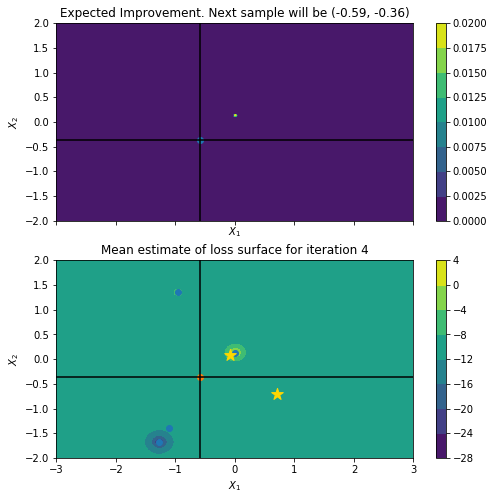

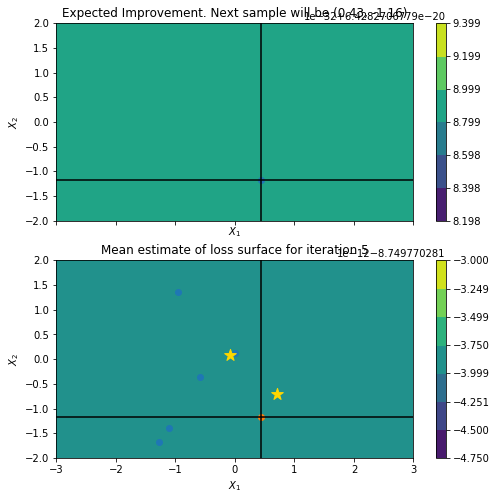

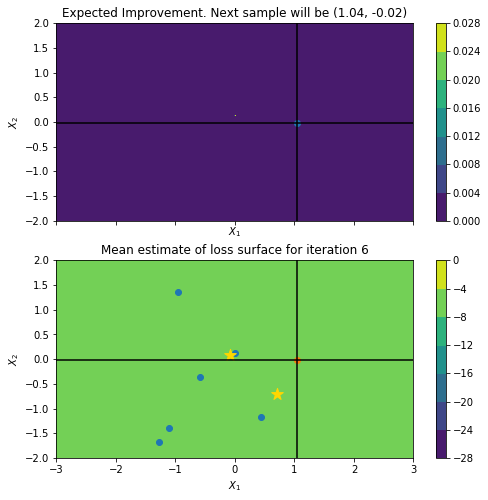

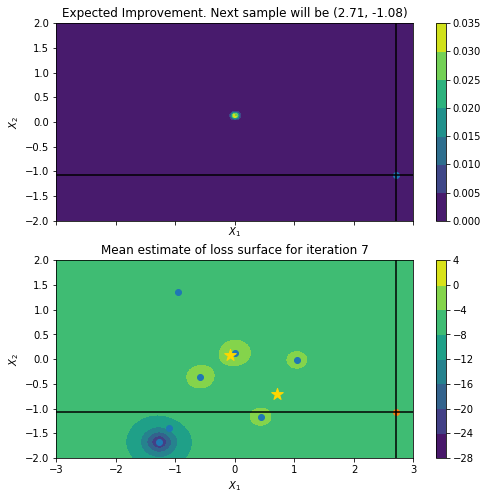

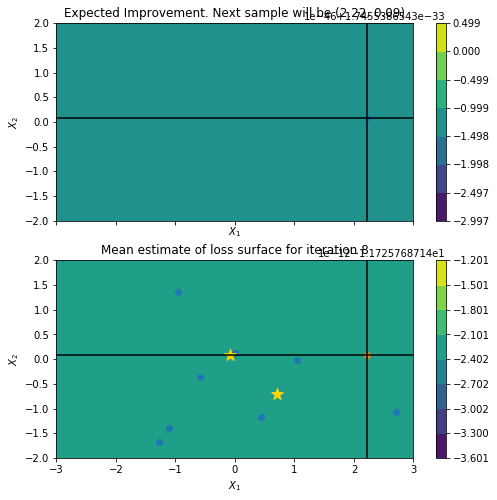

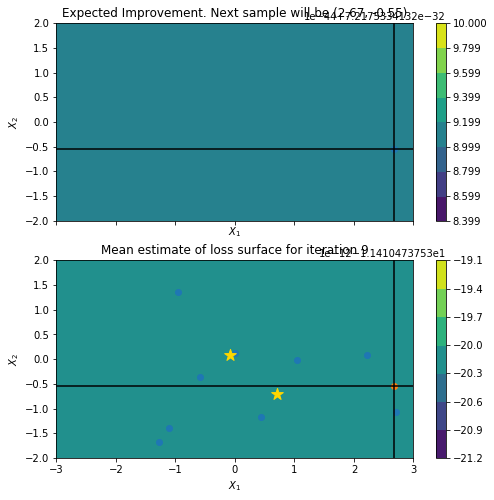

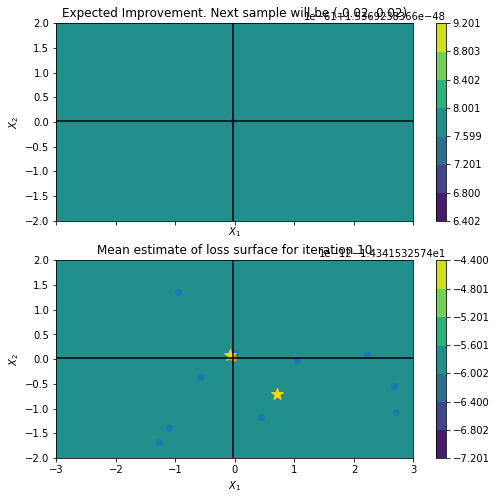

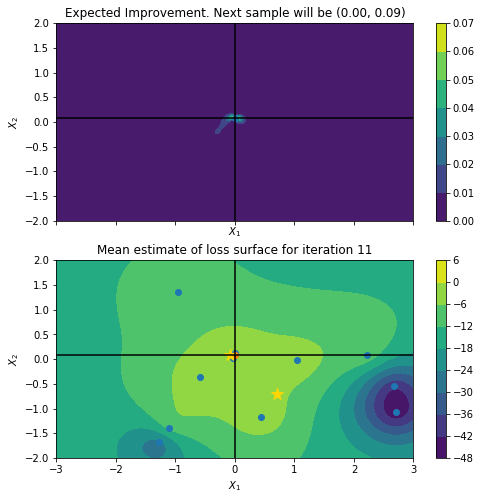

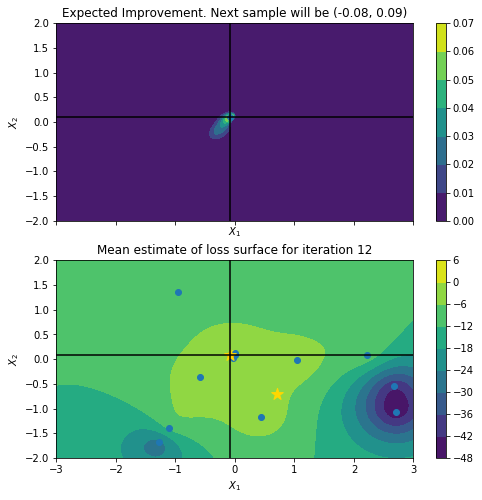

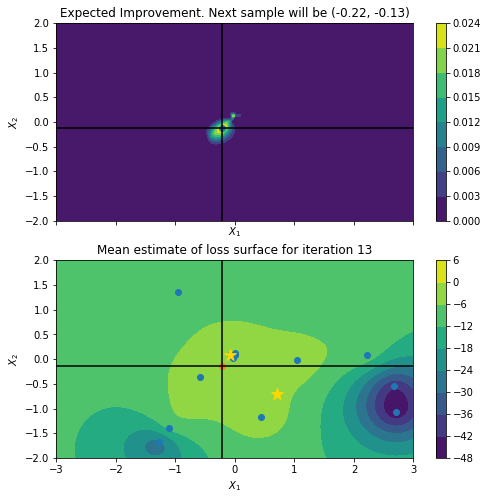

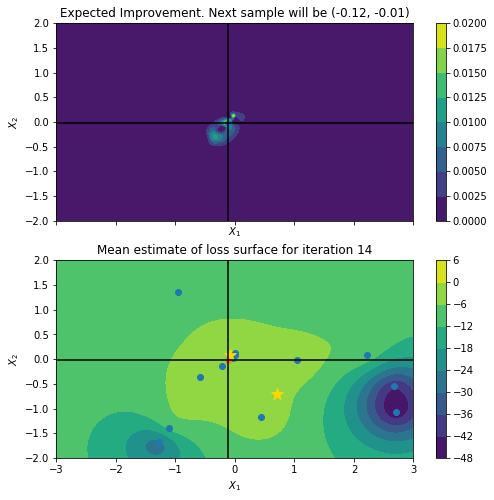

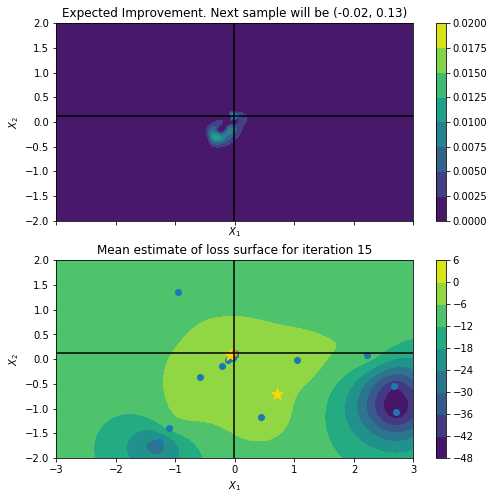

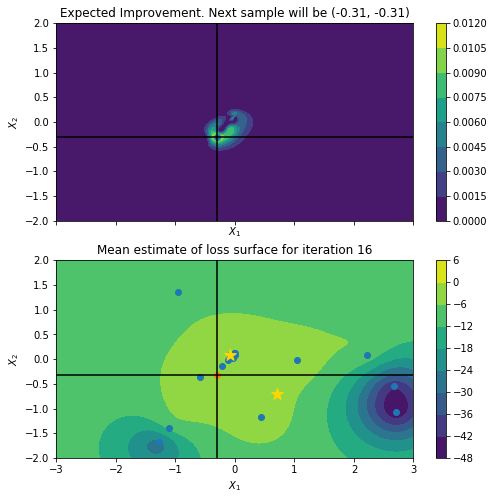

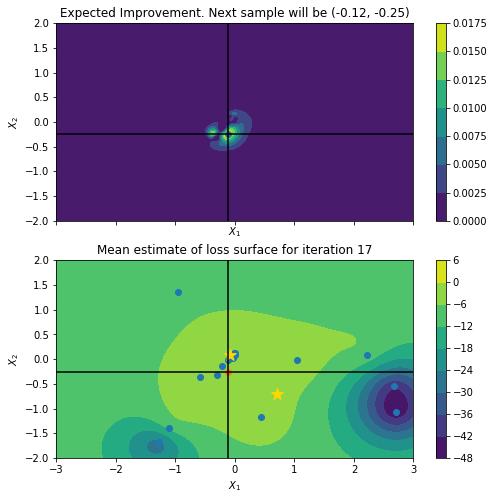

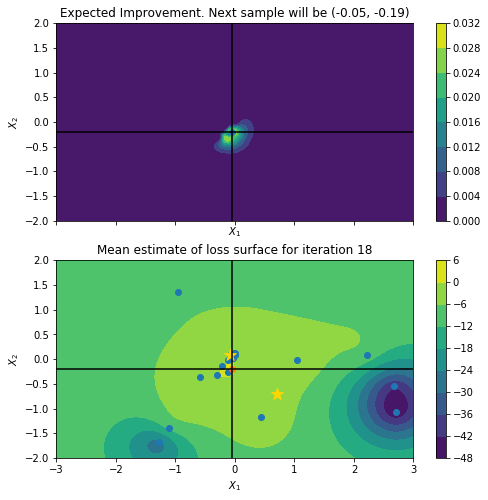

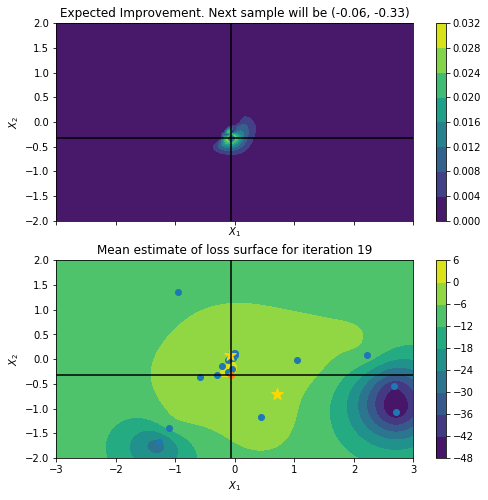

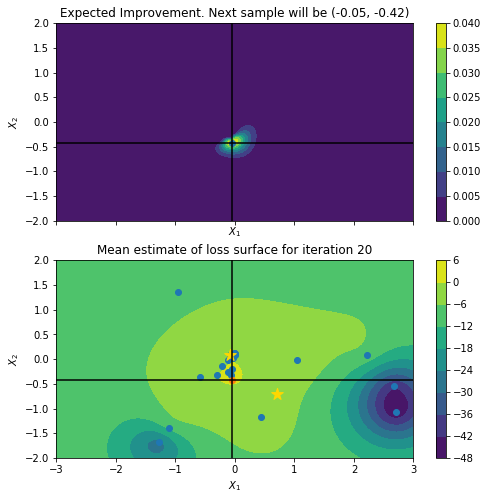

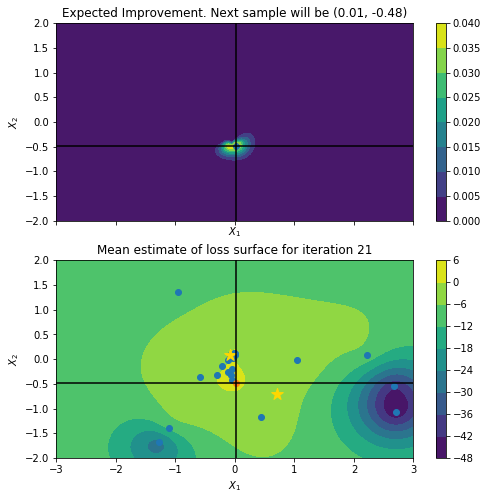

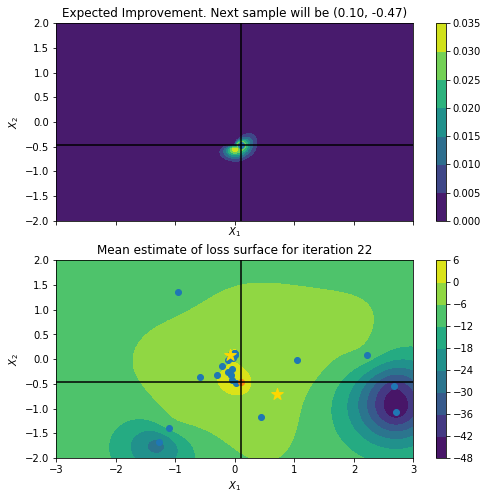

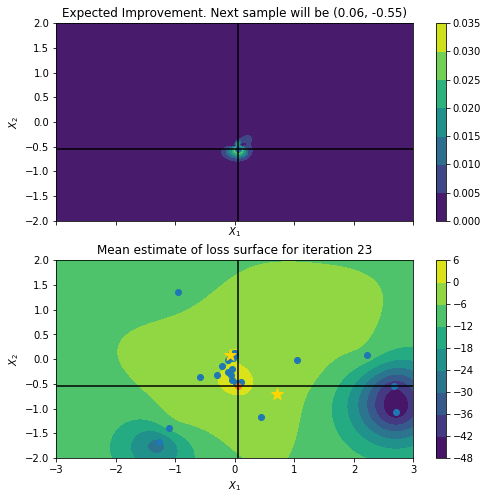

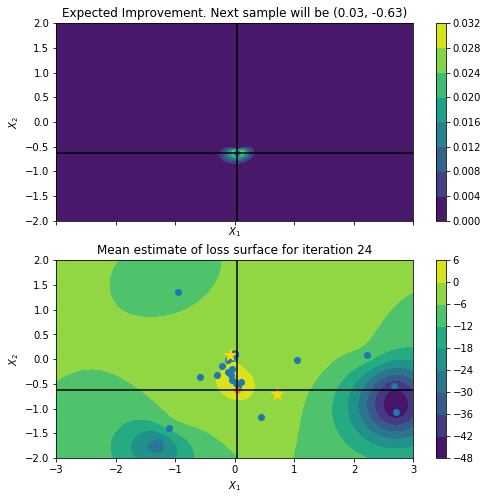

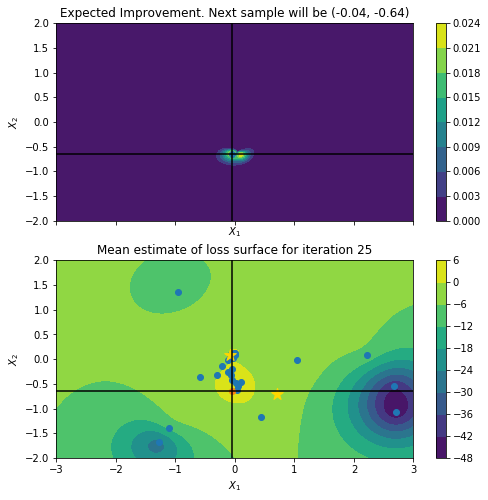

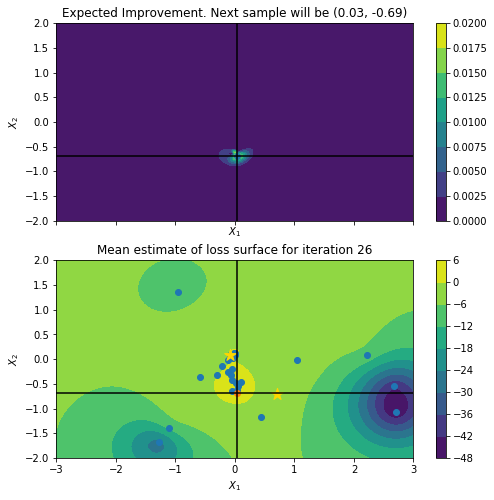

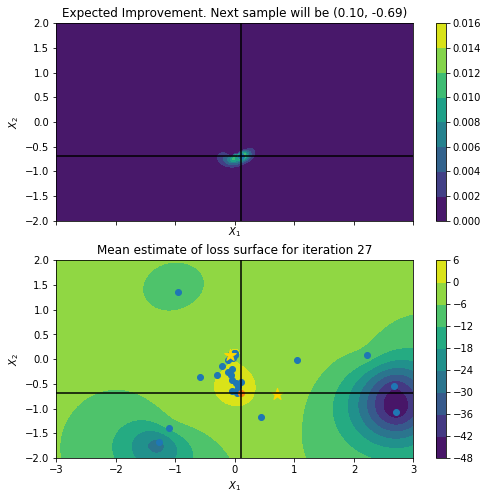

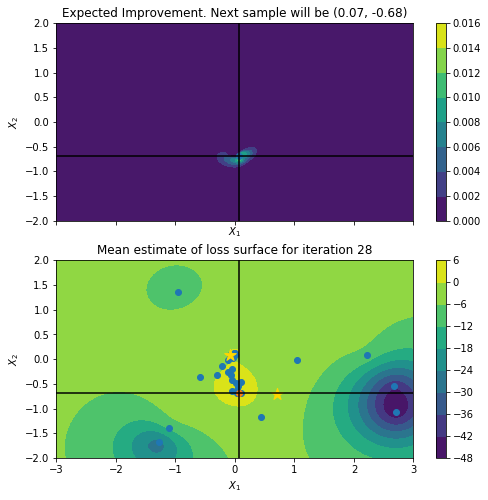

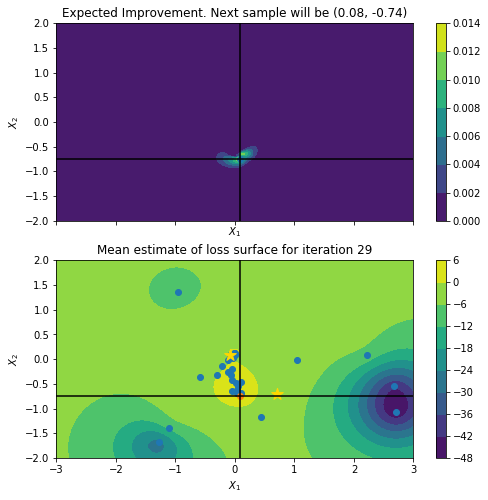

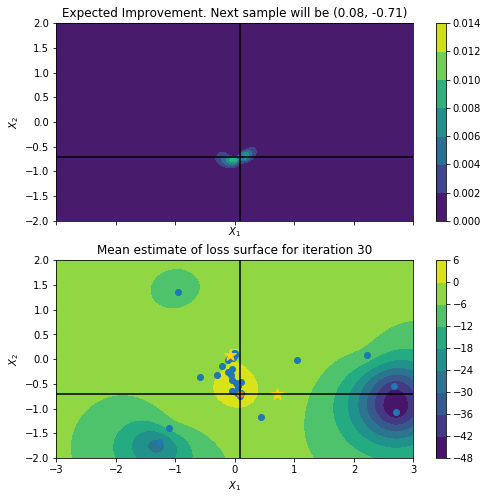

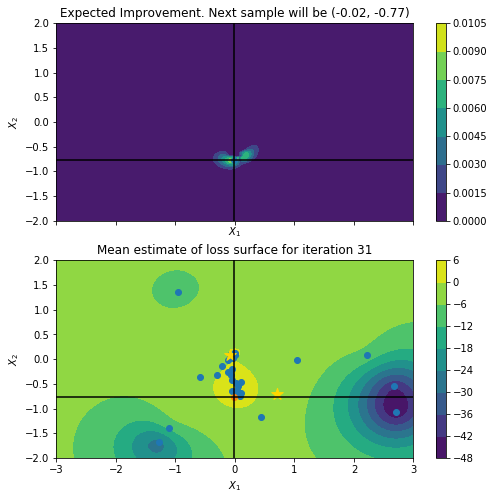

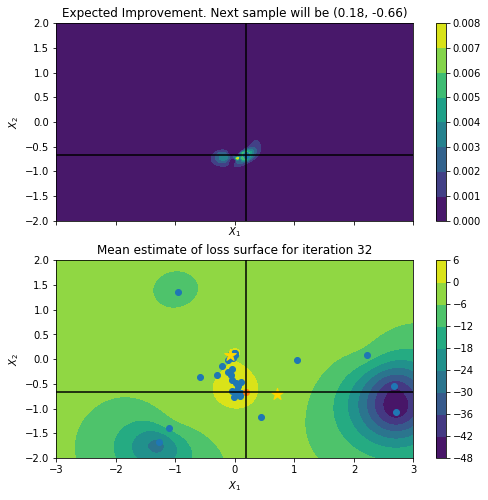

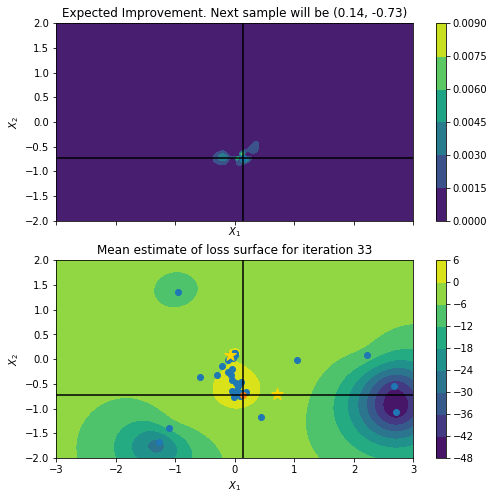

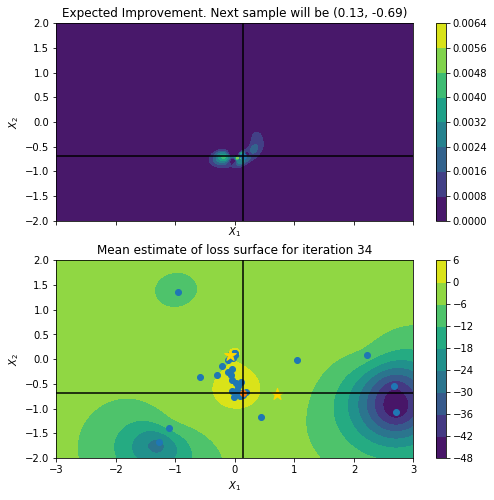

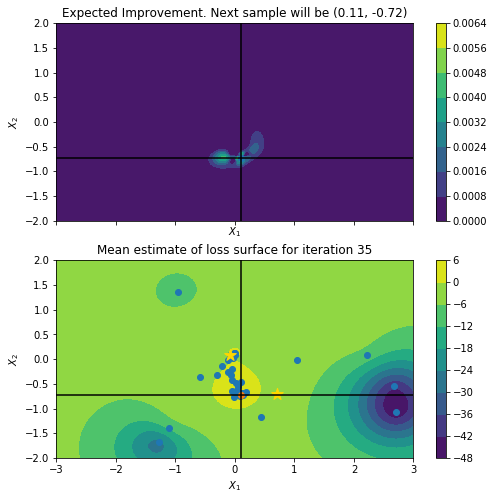

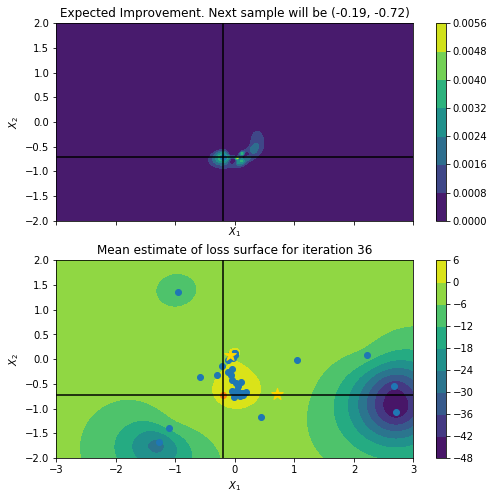

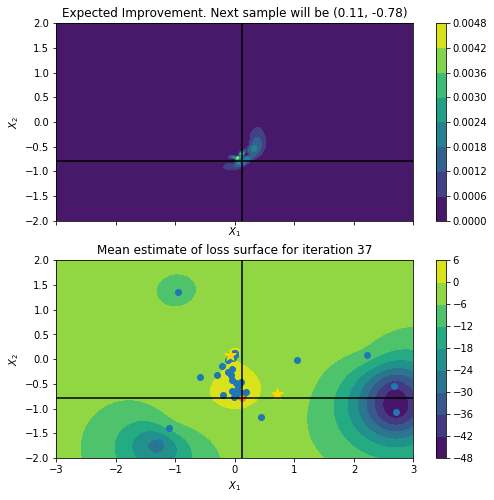

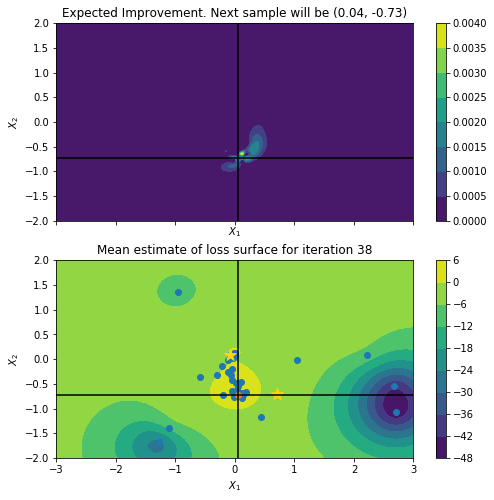

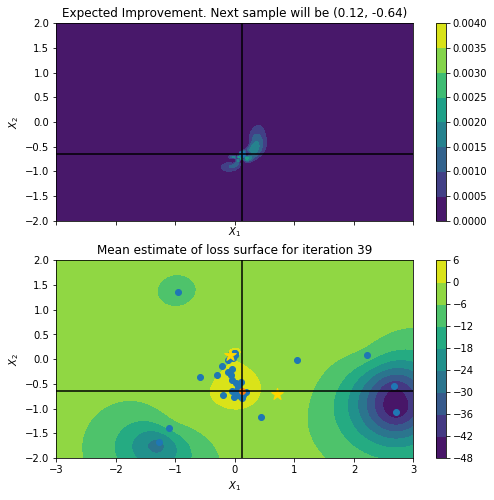

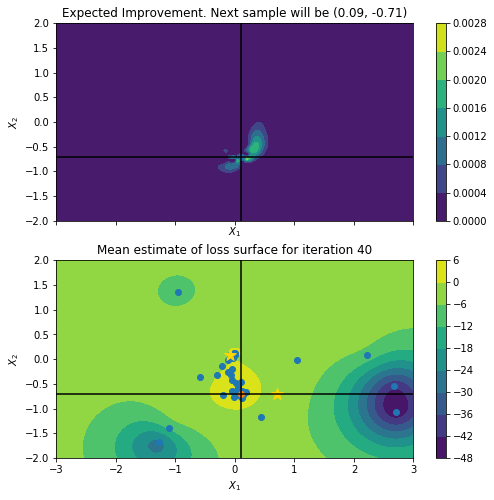

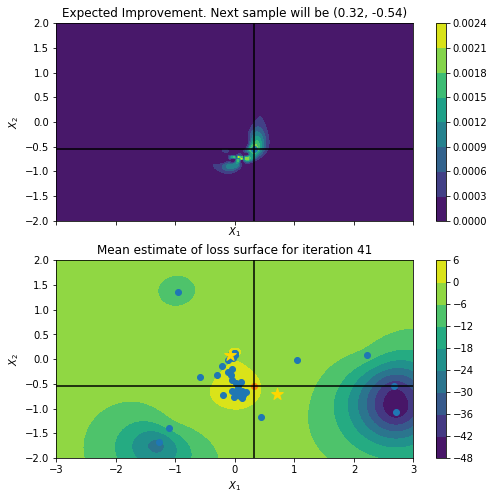

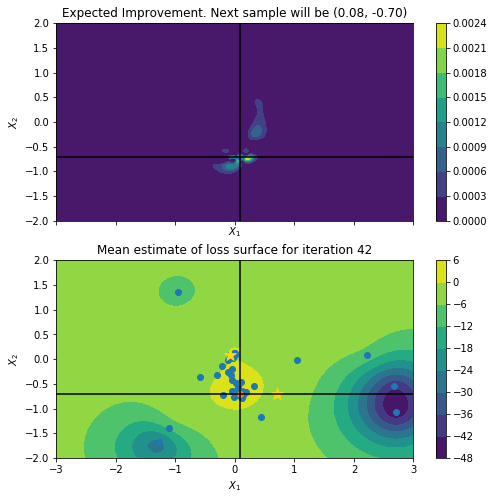

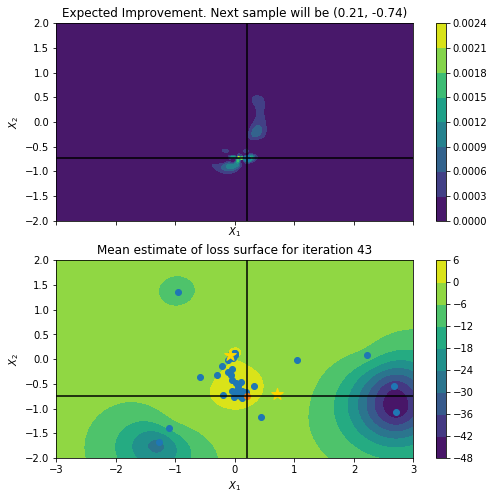

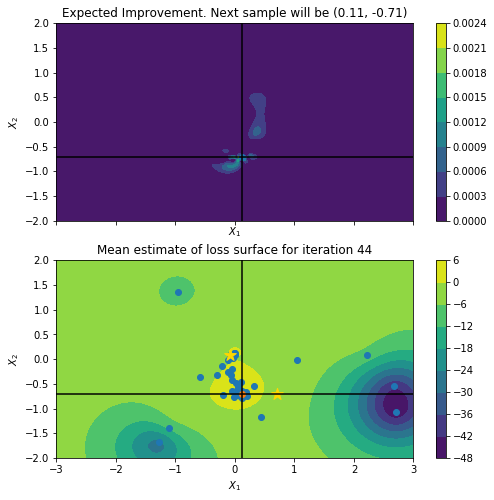

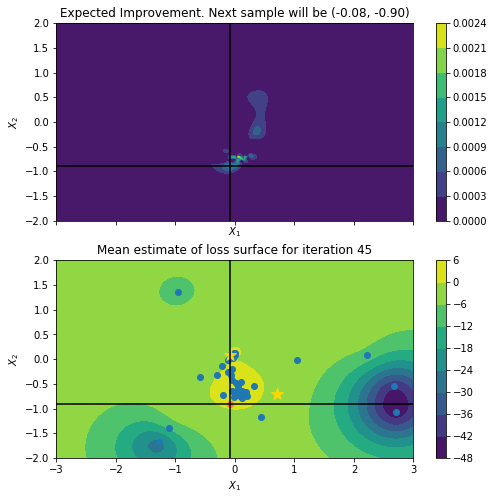

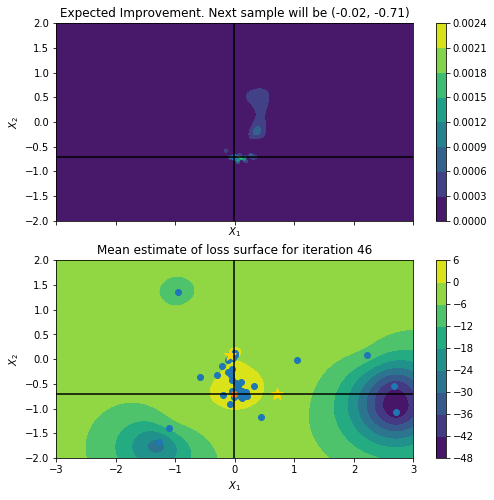

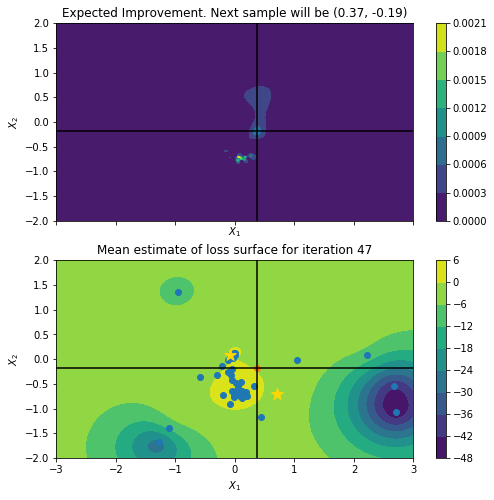

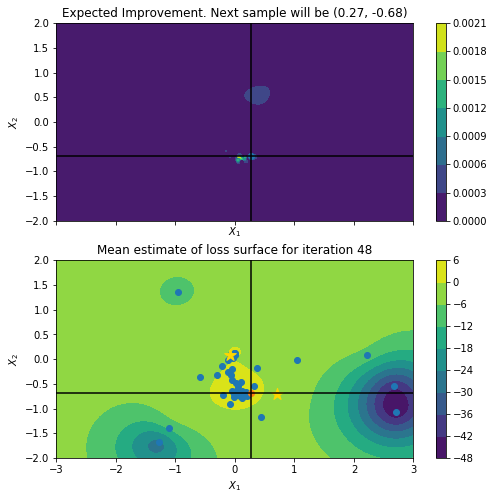

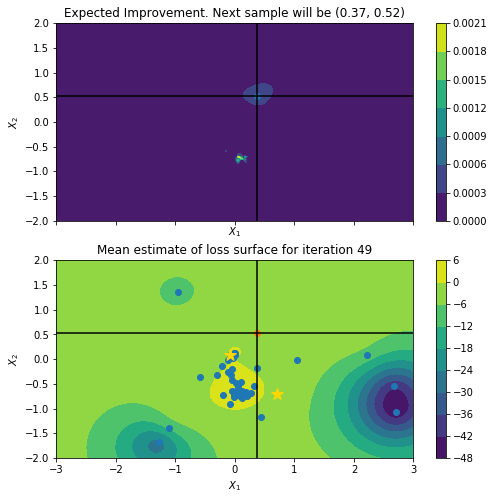

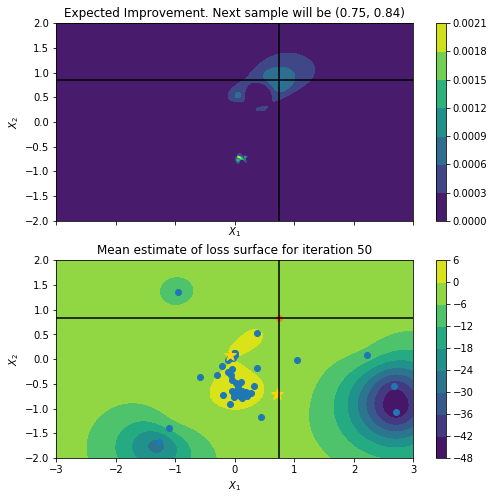

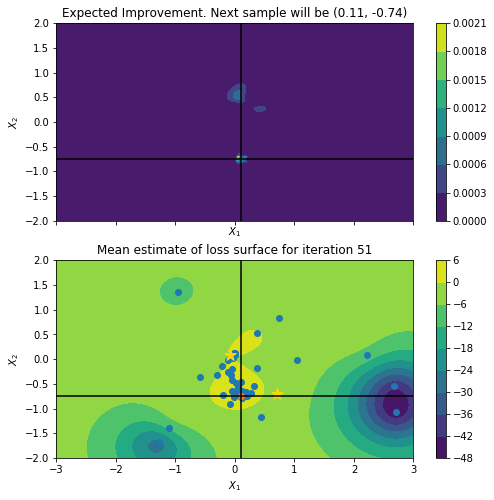

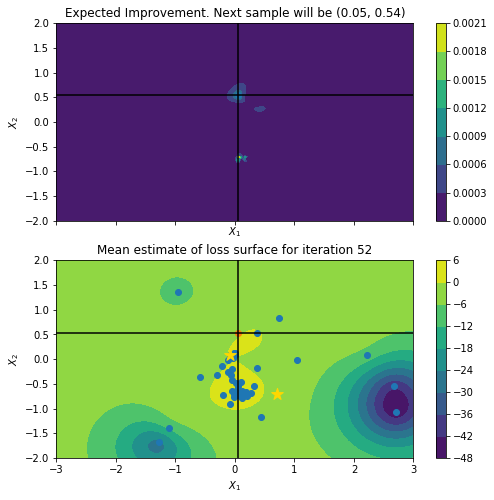

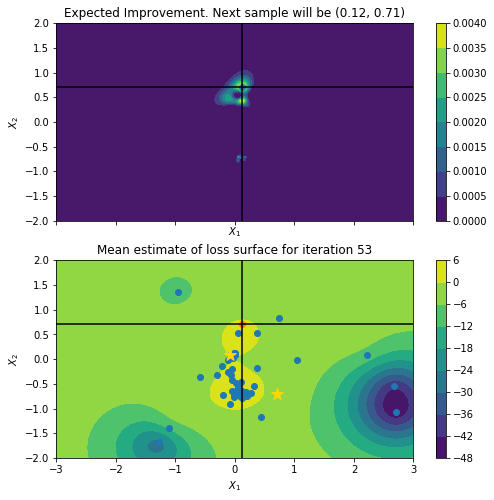

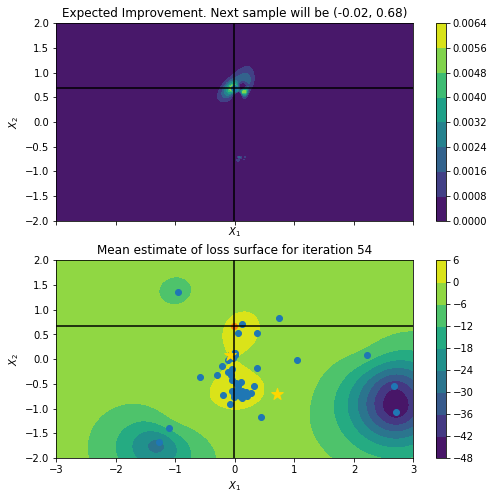

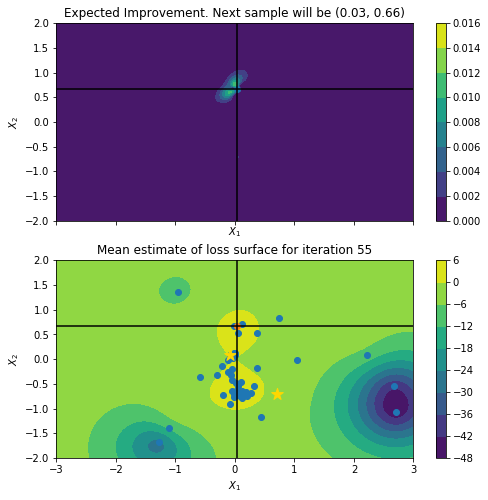

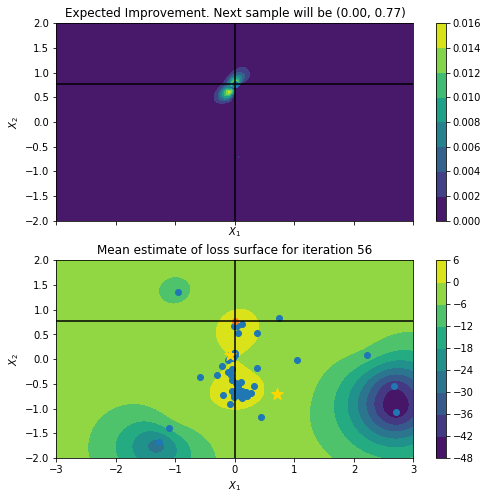

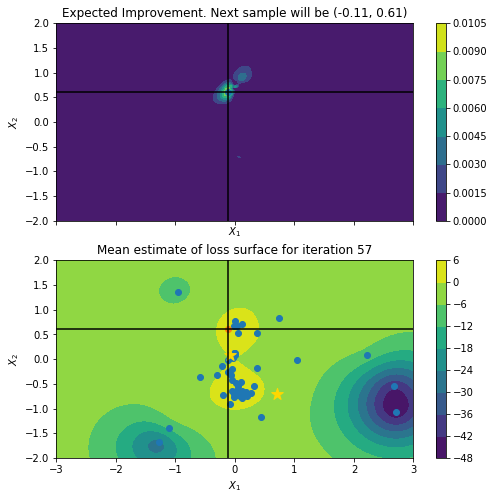

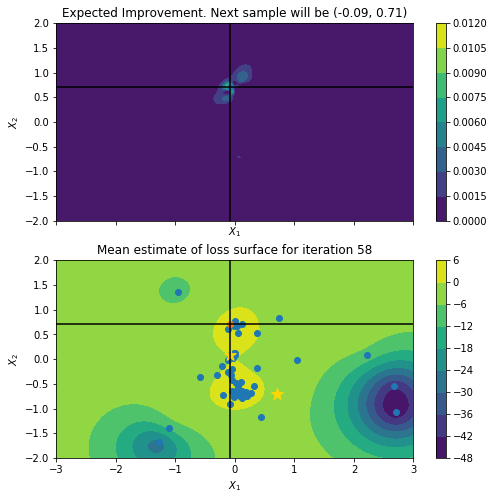

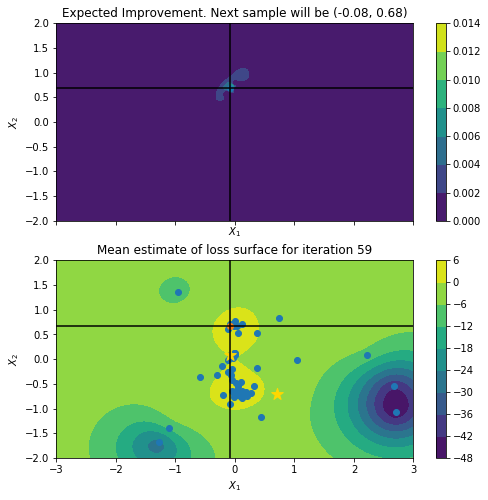

In [110]:
import sklearn.gaussian_process as gp
rc('text', usetex=False)
plot_iteration(X1Vals, xp, yp, first_iter=3, second_param_grid=X2Vals, optimum=np.array([[-0.08708709,0.71071071], [0.08708709,-0.71071071]]))